<a href="https://colab.research.google.com/github/SerDavidE/data-pipeline-automation/blob/main/Case_study_Gans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. import libraries
from bs4 import BeautifulSoup
import requests
import pandas as pd

##To download html files:

In [2]:
import requests

# Wikipedia URL for the city
url = "https://en.wikipedia.org/wiki/Berlin"

# Send a GET request
response = requests.get(url)

# The HTML content of the page is contained in response.content

# To write this content to a file, you can use the built-in open function with the 'w' flag to write to a file
with open('berlin_wikipedia.html', 'w', encoding='utf-8') as f:
    f.write(response.text)


#Test

In [3]:
# 2. find url and store it in a variable
url = "https://en.wikipedia.org/wiki/Berlin"

In [4]:
# now, we know we can access with our code (robot) to the website safely.
# Let's go to it :)
# 3. download html with a get request
response = requests.get(url)
response.status_code # 200 status code means OK!

200

In [5]:
# 4.1. parse html (create the 'soup')
soup = BeautifulSoup(response.content, "html.parser")
# 4.2. check that the html code looks like it should

# print(soup.prettify())

In [6]:
table = soup.find('table')

In [24]:
for row in table.find_all('tr'):
    headers = row.find_all('th')
    for header in headers:
        if '• City/State' in header.text:
            data = row.find('td').text
            print(data)

In [25]:
header = soup.select_one('th:-soup-contains("City/State")')
if header:
    data = header.find_next_sibling('td').text
    print(data)

In [27]:
for row in table.find_all('tr'):
    headers = row.find_all('th')
    data = [header.text for header in headers]
    print(data)

['Paris']
[]
[]
[]
[]
[]
[]
[]
['Country']
['Region']
['Department']
['Intercommunality']
['Subdivisions']
['Government']
['\xa0•\xa0Mayor (2020–2026) ']
['Area1']
['\xa0•\xa0Urban\xa0(2020)']
['\xa0•\xa0Metro\xa0(2020)']
['Population\xa0(2023)[2]']
['\xa0•\xa0Density']
['\xa0•\xa0Urban\xa0(2019[3])']
['\xa0•\xa0Urban\xa0density']
['\xa0•\xa0Metro\xa0(Jan.\xa02017[4])']
['\xa0•\xa0Metro\xa0density']
['Demonym(s)']
['Time zone']
['\xa0•\xa0Summer (DST)']
['INSEE/Postal code']
['Elevation']
['Website']
[]


In [28]:
# Find the table in the soup
table = soup.find('table')

# Create a list to store the table data
data = []

# Find all the rows in the table
rows = table.find_all('tr')

In [ ]:
rows

In [30]:
# Loop through each row
for row in rows:
    # Find all the columns in the row
    cols = row.find_all('td')

    # Get the text from the columns
    cols = [col.text.strip() for col in cols]

    # Add the columns to the data array
    data.append(cols)

# Convert the list into a DataFrame
df = pd.DataFrame(data)

print(df)

                                                    0
0                                                None
1               Capital city, commune, and department
2   Eiffel Tower and the Seine from Tour Saint-Jac...
3                                    FlagCoat of arms
4   Motto(s): Fluctuat nec mergitur"Tossed by the ...
5                                   Location of Paris
6   ParisShow map of FranceParisShow map of Île-de...
7   Coordinates: 48°51′24″N 2°21′8″E﻿ / ﻿48.85667°...
8                                              France
9                                       Île-de-France
10                                              Paris
11                           Métropole du Grand Paris
12                                 20 arrondissements
13                                               None
14                               Anne Hidalgo[1] (PS)
15                             105.4 km2 (40.7 sq mi)
16                        2,853.5 km2 (1,101.7 sq mi)
17                       18,

In [9]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# List of cities to scrape
cities = ['Berlin', 'Madrid', 'Paris']

# DataFrame to store the results
df = pd.DataFrame(columns=['City', 'Area', 'Metro', 'Coordinates'])

for city in cities:
    # Wikipedia URL for the city
    url = f"https://en.wikipedia.org/wiki/{city}"

    # Send a GET request
    response = requests.get(url)

    # Parse the HTML content
    soup = BeautifulSoup(response.content, 'html.parser')

    # Find the table that contains the infobox data
    table = soup.find('table', {'class': 'infobox ib-settlement vcard'})

    # Get metro population
    metro_row = table.find('a', string='Metro')
    if metro_row is not None:
      metro = metro_row.find_next('td', class_="infobox-data").get_text(strip=True)
    else:
      metro = 'N/A'

    # Get city/state
    city_state_row = soup.select_one('th:-soup-contains("City/State")')
    if city_state_row is not None:
        city_state = city_state_row.find_next_sibling('td').get_text(strip=True)
    else:
        city_state = 'N/A'

    # Get capital city
    capital_city_row = soup.select_one('th:contains("Capital City")')
    if capital_city_row is not None:
        capital_city = capital_city_row.find_next_sibling('td').get_text(strip=True)
    else:
        capital_city = 'N/A'

    # Get urban area
    urban_area_row = soup.select_one('th:contains("Urban")')
    if urban_area_row is not None:
        urban_area = urban_area_row.find_next_sibling('td').get_text(strip=True)
    else:
        urban_area = 'N/A'


    # Get area
    area_row = table.find('th', string='Area')
    if area_row is not None:
        area = area_row.find_next_sibling('td', class_="infobox-data").get_text(strip=True)
    else:
        area = 'N/A'

    # Get coordinates
    coordinates = table.find('span', {'class': 'geo'}).get_text(strip=True)

    # Add the data to the DataFrame
    data_to_add = pd.DataFrame({'City': [city],
                                'Metro': [metro],
                                'Area': [city_state],
                                #'Area': [area],
                                'Coordinates': [coordinates]})
    df = pd.concat([df, data_to_add])

# Reset the DataFrame index
df.reset_index(drop=True, inplace=True)

# Print the DataFrame
print(df)


/usr/local/lib/python3.10/dist-packages/soupsieve/css_parser.py:856: FutureWarning: The pseudo class ':contains' is deprecated, ':-soup-contains' should be used moving forward.
  warnings.warn(  # noqa: B028


     City                    Area         Metro         Coordinates
0  Berlin  891.3 km2(344.1 sq mi)     6,144,600  52.52000; 13.40500
1  Madrid                     N/A  6,791,667[1]  40.41694; -3.70333
2   Paris                     N/A    13,024,518   48.85667; 2.35222


In [10]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# List of cities to scrape
cities = ['Berlin', 'Madrid', 'Paris']

# DataFrame to store the results
df = pd.DataFrame(columns=['City', 'Population', 'Area', 'Coordinates'])

for city in cities:
    # Wikipedia URL for the city
    url = f"https://en.wikipedia.org/wiki/{city}"

    # Send a GET request
    response = requests.get(url)

    # Parse the HTML content
    soup = BeautifulSoup(response.content, 'html.parser')

    # Find the table that contains the infobox data
    table = soup.find('table', {'class': 'infobox ib-settlement vcard'})
    if table is None:
        print(f"Could not find info box table for {city}. Skipping this city.")
        continue

    # Get population
    population_row = table.find('th', string='•\xa0City/State')
    if population_row is not None:
        population = population_row.find_next_sibling('td').get_text(strip=True)
    else:
        population = 'N/A'

    # Get area
    area_row = table.find('th', string='Area')
    if area_row is not None:
        area = area_row.find_next_sibling('td').get_text(strip=True)
    else:
        area = 'N/A'

    # Get coordinates
    coordinates = table.find('span', {'class': 'geo'}).get_text(strip=True)

    # Add the data to the DataFrame
    data_to_add = pd.DataFrame({'City': [city],
                                'Population': [population],
                                'Area': [area],
                                'Coordinates': [coordinates]})
    df = pd.concat([df, data_to_add])

# Reset the DataFrame index
df.reset_index(drop=True, inplace=True)

# Print the DataFrame
print(df)


     City Population Area         Coordinates
0  Berlin        N/A  N/A  52.52000; 13.40500
1  Madrid        N/A  N/A  40.41694; -3.70333
2   Paris        N/A  N/A   48.85667; 2.35222


In [11]:
for s in soup.select("table.infobox tbody tr th"):
    if s.text.startswith("City/State"):
        print(s.find_next_sibling("td")[0].text)

In [12]:
# Get population
population_row = table.find('th', text='•\xa0City/State')
if population_row is not None:
    population = population_row.find_next_sibling('td').get_text(strip=True)
else:
    population = 'N/A'

<ipython-input-12-e4541dc90c1e>:2: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  population_row = table.find('th', text='•\xa0City/State')


In [13]:
soup.select("table.infobox ib-settlement vcard")

[]

In [14]:
soup.select("th.infobox-header")

[<th class="infobox-header" colspan="2">Government<div class="ib-settlement-fn"></div></th>]

In [15]:
soup.select("td.infobox-data")

[<td class="infobox-data"><a href="/wiki/France" title="France">France</a></td>,
 <td class="infobox-data"><a href="/wiki/%C3%8Ele-de-France" title="Île-de-France">Île-de-France</a></td>,
 <td class="infobox-data">Paris</td>,
 <td class="infobox-data"><a href="/wiki/Grand_Paris" title="Grand Paris">Métropole du Grand Paris</a></td>,
 <td class="infobox-data">20 <a href="/wiki/Arrondissements_of_Paris" title="Arrondissements of Paris">arrondissements</a></td>,
 <td class="infobox-data"><a href="/wiki/Anne_Hidalgo" title="Anne Hidalgo">Anne Hidalgo</a><sup class="reference" id="cite_ref-1"><a href="#cite_note-1">[1]</a></sup> (<a href="/wiki/Socialist_Party_(France)" title="Socialist Party (France)">PS</a>)</td>,
 <td class="infobox-data">105.4 km<sup>2</sup> (40.7 sq mi)</td>,
 <td class="infobox-data">2,853.5 km<sup>2</sup> (1,101.7 sq mi)</td>,
 <td class="infobox-data">18,940.7 km<sup>2</sup> (7,313.0 sq mi)</td>,
 <td class="infobox-data">2,102,650</td>,
 <td class="infobox-data">20

In [16]:
soup.select("table.infobox.ib-settlement.vcard")[0].get_text()

'ParisCapital city, commune, and departmentEiffel Tower and the Seine from Tour Saint-JacquesNotre-DameSacré-CœurPanthéonArc de TriomphePalais GarnierThe Louvre\n\nFlagCoat of armsMotto(s):\xa0Fluctuat nec mergitur"Tossed by the waves but never sunk"Location of Paris\nParisShow map of FranceParisShow map of Île-de-France (region)Coordinates: 48°51′24″N 2°21′8″E\ufeff / \ufeff48.85667°N 2.35222°E\ufeff / 48.85667; 2.35222CountryFranceRegionÎle-de-FranceDepartmentParisIntercommunalityMétropole du Grand ParisSubdivisions20 arrondissementsGovernment\xa0•\xa0Mayor (2020–2026) Anne Hidalgo[1] (PS)Area1105.4\xa0km2 (40.7\xa0sq\xa0mi)\xa0•\xa0Urban\xa0(2020)2,853.5\xa0km2 (1,101.7\xa0sq\xa0mi)\xa0•\xa0Metro\xa0(2020)18,940.7\xa0km2 (7,313.0\xa0sq\xa0mi)Population\xa0(2023)[2]2,102,650\xa0•\xa0Density20,000/km2 (52,000/sq\xa0mi)\xa0•\xa0Urban\xa0(2019[3])10,858,852\xa0•\xa0Urban\xa0density3,800/km2 (9,900/sq\xa0mi)\xa0•\xa0Metro\xa0(Jan.\xa02017[4])13,024,518\xa0•\xa0Metro\xa0density690/km2 (1,

In [17]:
soup.select("table.infobox tbody tr td")[0].get_text()

'Capital city, commune, and department'

In [18]:
# we can use .get_text() to extract the content of the tags we selected
# we'll need to do it to each tag with a for loop: here we do it to the first one
soup.select("th.infobox-header")[0].get_text()

'Government'

In [19]:
# the rating are inside a 'td' tag
soup.select("td.infobox-data")[0].get_text()

'France'

In [32]:
geo

<span class="geo">48.85667; 2.35222</span>

### Storing information in lists

In [21]:
# Initialize empty lists
city_names = []
countries = []
latitudes = []
longitudes = []
populations = []

num_iter = len(soup.select("th"))

In [34]:
print(f'City Names: {len(city_names)}')
print(f'Countries: {len(countries)}')
print(f'Latitudes: {len(latitudes)}')
print(f'Longitudes: {len(longitudes)}')
print(f'Populations: {len(populations)}')

City Names: 0
Countries: 0
Latitudes: 0
Longitudes: 0
Populations: 0


In [35]:
# Check that all lists are of the same length before creating a DataFrame
assert len(city_names) == len(countries) == len(latitudes) == len(longitudes) == len(populations)

# Storing information in a pandas DataFrame
df = pd.DataFrame({
    'City Name': city_names,
    'Country': countries,
    'Latitude': latitudes,
    'Longitude': longitudes,
    'Population': populations
})

print(df)

Empty DataFrame
Columns: [City Name, Country, Latitude, Longitude, Population]
Index: []


In [36]:
import requests
from bs4 import BeautifulSoup
import re

cities = ['Berlin','Vienna','Rome','Paris','Barcelona','Prague','Budapest','Madrid','Athens']
for c in cities:
  page = requests.get(f'https://en.wikipedia.org/wiki/{c}')
  soup = BeautifulSoup(page.text,'html.parser')
  print(c)
  print(max(list(map(lambda tag: int(tag.text.split('[')[0].replace(',','')) ,soup.find('table',class_='infobox ib-settlement vcard').find('tbody').find_all(lambda tag: re.search("^\d{1,3},\d{3},\d{3}",tag.text), recursive=True)))))

Berlin
6144600
Vienna
2890577
Rome
4342212
Paris
13024518
Barcelona
5474482
Prague
2709418
Budapest
3011598
Madrid
6791667
Athens
3638281


#New

In [40]:
import requests

name = 'Berlin'
api_url = 'https://api.api-ninjas.com/v1/city?name={}'.format(name)
response = requests.get(api_url, headers={'X-Api-Key': 'XXXX'})
if response.status_code == requests.codes.ok:
    print(response.text)
else:
    print("Error:", response.status_code, response.text)

[{"name": "Berlin", "latitude": 52.5167, "longitude": 13.3833, "country": "DE", "population": 3644826, "is_capital": true}]


#API Test Weather

In [45]:
import pandas as pd
import requests
import json

In [46]:
from IPython.display import JSON
display(JSON)

IPython.core.display.JSON

In [47]:
weather = requests.get("https://openweathermap.org/")
weather

<Response [200]>

In [48]:
cities = ['Berlin', 'Madrid', 'Paris']

In [49]:
API_key = ['XXX']

In [50]:
weather = requests.get(f"http://api.openweathermap.org/data/2.5/forecast?q={city}&appid={API_key}&units=metric")

In [51]:
import requests
import pandas as pd

def get_weather(cities, API_key):
    # Initialize empty lists for our data
    city_names = []
    temps = []
    humidities = []
    pressures = []
    weather_descriptions = []

    for city in cities:
        # Make the API call
        response = requests.get(f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={API_key}&units=metric")

        # Check if the request was successful
        if response.status_code == 200:
            # Parse the JSON response
            data = response.json()

            # Extract and store the data we're interested in
            city_names.append(data['name'])
            temps.append(data['main']['temp'])
            humidities.append(data['main']['humidity'])
            pressures.append(data['main']['pressure'])
            weather_descriptions.append(data['weather'][0]['description'])
        else:
            print(f"Failed to get the weather for {city}")

    # Consolidate the data into a DataFrame
    df = pd.DataFrame({
        'City': city_names,
        'Temperature': temps,
        'Humidity': humidities,
        'Pressure': pressures,
        'Weather': weather_descriptions,
    })

    return df



In [52]:
API_key = 'XXXX'
cities = ['Berlin', 'Paris', 'Madrid']
df = get_weather(cities, API_key)
print(df)


     City  Temperature  Humidity  Pressure     Weather
0  Berlin        17.38        66      1012  few clouds
1   Paris        19.20        57      1028  few clouds
2  Madrid        27.10        47      1025   clear sky


In [53]:
import requests
import pandas as pd
from datetime import datetime, timedelta

def get_weather(cities, API_key):
    # Initialize empty lists for our data
    city_names = []
    temps = []
    humidities = []
    pressures = []
    weathers = []

    for city in cities:
        # Make the API call for current weather to get city's coordinates
        response = requests.get(f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={API_key}&units=metric")

        # Check if the request was successful
        if response.status_code == 200:
            data = response.json()

            # Get city's latitude and longitude
            lat, lon = data['coord']['lat'], data['coord']['lon']

            # Make the API call for 5-day / 3-hour forecast data
            forecast_response = requests.get(f"http://api.openweathermap.org/data/2.5/forecast?lat={lat}&lon={lon}&appid={API_key}&units=metric")

            # Check if the request was successful
            if forecast_response.status_code == 200:
                forecast = forecast_response.json()
                # Get forecast for 12:00 PM or the closest available time
                for forecast_time in forecast['list']:
                    # Parse the timestamp
                    dt = datetime.fromtimestamp(forecast_time['dt'])
                    if dt.hour == 12:
                        # Append the data to our lists
                        city_names.append(city)
                        temps.append(forecast_time['main']['temp'])
                        humidities.append(forecast_time['main']['humidity'])
                        pressures.append(forecast_time['main']['pressure'])
                        weathers.append(forecast_time['weather'][0]['description'])
                        # Exit the loop as we have found our forecast
                        break
            else:
                print(f"Failed to get the forecast for {city}")
        else:
            print(f"Failed to get the weather for {city}")

    # Consolidate the data into a DataFrame
    df = pd.DataFrame({
        'City': city_names,
        'Temperature': temps,
        'Humidity': humidities,
        'Pressure': pressures,
        'Weather': weathers
    })

    return df

API_key = 'XXXX'
cities = ['Berlin', 'Paris', 'Madrid']
df = get_weather(cities, API_key)
print(df)


     City  Temperature  Humidity  Pressure          Weather
0  Berlin        14.85        75      1021       light rain
1   Paris        19.69        42      1027  overcast clouds
2  Madrid        27.60        29      1023        clear sky


In [54]:
import requests
import pandas as pd

def get_weather(cities, API_key):
    # Initialize an empty list for our data
    forecast_data = []

    for city in cities:
        # Make the API call for current weather to get city's coordinates
        response = requests.get(f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={API_key}&units=metric")

        # Check if the request was successful
        if response.status_code == 200:
            data = response.json()

            # Get city's latitude and longitude
            lat, lon = data['coord']['lat'], data['coord']['lon']

            # Make the API call for 5-day / 3-hour forecast data
            forecast_response = requests.get(f"http://api.openweathermap.org/data/2.5/forecast?lat={lat}&lon={lon}&appid={API_key}&units=metric")

            # Check if the request was successful
            if forecast_response.status_code == 200:
                forecast_data.append(forecast_response.json())
            else:
                print(f"Failed to get the forecast for {city}")
        else:
            print(f"Failed to get the weather for {city}")

    return forecast_data


In [55]:
API_key = 'XXXX'
cities = ['Berlin', 'Paris', 'Madrid']
forecast_data = get_weather(cities, API_key)

# Now, forecast_data is a list of JSON data for each city
# You can print it to see what it looks like
for city_data in forecast_data:
    print(city_data)


{'cod': '200', 'message': 0, 'cnt': 40, 'list': [{'dt': 1696431600, 'main': {'temp': 17.45, 'feels_like': 16.95, 'temp_min': 17.45, 'temp_max': 17.55, 'pressure': 1012, 'sea_level': 1012, 'grnd_level': 1017, 'humidity': 65, 'temp_kf': -0.1}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'clouds': {'all': 20}, 'wind': {'speed': 5.89, 'deg': 255, 'gust': 8.93}, 'visibility': 10000, 'pop': 0, 'sys': {'pod': 'd'}, 'dt_txt': '2023-10-04 15:00:00'}, {'dt': 1696442400, 'main': {'temp': 17.02, 'feels_like': 16.37, 'temp_min': 16.17, 'temp_max': 17.02, 'pressure': 1016, 'sea_level': 1016, 'grnd_level': 1018, 'humidity': 61, 'temp_kf': 0.85}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'clouds': {'all': 44}, 'wind': {'speed': 4.49, 'deg': 258, 'gust': 9.2}, 'visibility': 10000, 'pop': 0, 'sys': {'pod': 'n'}, 'dt_txt': '2023-10-04 18:00:00'}, {'dt': 1696453200, 'main': {'temp': 16.03, 'feels_like': 15.33, 

In [56]:
def transform_to_df(forecast_data, cities):
    city_dfs = []

    for i, city_data in enumerate(forecast_data):
        # Create a dictionary with the data we're interested in
        data = {
            'date': [item['dt_txt'] for item in city_data['list']],
            'temp': [item['main']['temp'] for item in city_data['list']],
            'humidity': [item['main']['humidity'] for item in city_data['list']],
        }

        # Create a DataFrame from the dictionary
        df = pd.DataFrame(data)

        # Add a column with the city name
        df['city'] = cities[i]

        city_dfs.append(df)

    # Concatenate all the city DataFrames into one DataFrame
    forecast_df = pd.concat(city_dfs, ignore_index=True)

    return forecast_df

In [57]:
forecast_df = transform_to_df(forecast_data, cities)

# Now, forecast_df is a DataFrame with the forecast data for all cities
print(forecast_df)

                    date   temp  humidity    city
0    2023-10-04 15:00:00  17.45        65  Berlin
1    2023-10-04 18:00:00  17.02        61  Berlin
2    2023-10-04 21:00:00  16.03        63  Berlin
3    2023-10-05 00:00:00  13.91        66  Berlin
4    2023-10-05 03:00:00  13.22        70  Berlin
..                   ...    ...       ...     ...
115  2023-10-09 00:00:00  22.98        27  Madrid
116  2023-10-09 03:00:00  20.89        35  Madrid
117  2023-10-09 06:00:00  19.50        46  Madrid
118  2023-10-09 09:00:00  22.26        44  Madrid
119  2023-10-09 12:00:00  26.43        33  Madrid

[120 rows x 4 columns]


In [58]:
forecast_df.reset_index()

,index,date,temp,humidity,city
0,0,2023-10-04 15:00:00,17.45,65,Berlin
1,1,2023-10-04 18:00:00,17.02,61,Berlin
2,2,2023-10-04 21:00:00,16.03,63,Berlin
3,3,2023-10-05 00:00:00,13.91,66,Berlin
4,4,2023-10-05 03:00:00,13.22,70,Berlin
...,...,...,...,...,...
115,115,2023-10-09 00:00:00,22.98,27,Madrid
116,116,2023-10-09 03:00:00,20.89,35,Madrid
117,117,2023-10-09 06:00:00,19.50,46,Madrid
118,118,2023-10-09 09:00:00,22.26,44,Madrid


In [59]:
forecast_df['date'] = pd.to_datetime(forecast_df['date'])

In [60]:
import pandas as pd

def forecast_to_df(forecast):
    # Get the city's name
    city_name = forecast['city']['name']

    # Create a list to store each forecast's data
    data = []

    # Go through the list of forecasts
    for item in forecast['list']:
        # Get the date from the timestamp
        date = pd.to_datetime(item['dt'], unit='s').date()

        # Get the weather data
        temperature = item['main']['temp']
        temp_min = item['main']['temp_min']
        temp_max = item['main']['temp_max']
        humidity = item['main']['humidity']
        weather = item['weather'][0]['main']

        # Add the data to the list
        data.append([city_name, date, temperature, temp_min, temp_max, humidity, weather])

    # Create a DataFrame from the data
    df = pd.DataFrame(data, columns=['City', 'Date', 'Temperature', 'Temp Min', 'Temp Max', 'Humidity', 'Weather'])

    return df


In [61]:
# Create a list to store the DataFrames
dfs = []

# Create a DataFrame for each city
for city_forecast in forecast_data:
    df = forecast_to_df(city_forecast)
    dfs.append(df)

# Concatenate the DataFrames
weather_df = pd.concat(dfs, ignore_index=True)


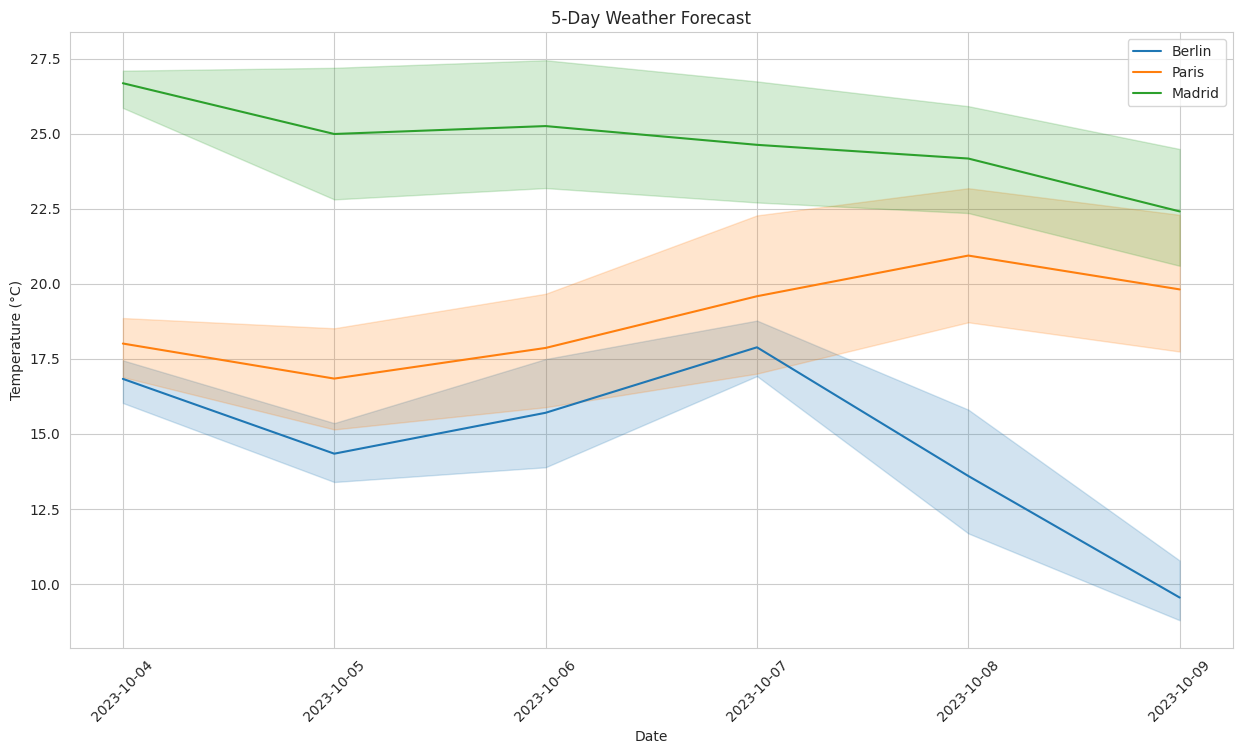

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the plot
sns.set_style("whitegrid")

# Get the list of unique cities
cities = weather_df['City'].unique()

# Create a new figure
plt.figure(figsize=(15, 8))

# Create a line plot for each city
for city in cities:
    city_df = weather_df[weather_df['City'] == city]
    sns.lineplot(x='Date', y='Temperature', data=city_df, label=city)

# Add a legend and labels
plt.legend()
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('5-Day Weather Forecast')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()



#OLD

In [37]:
def scrape_city_info(Berlin):
    r = requests.get(f"https://en.wikipedia.org/wiki/{Berlin}")
    soup = BeautifulSoup(r.content, 'html.parser')
    table = soup.find('table', {'class': 'infobox ib-settlement vcard'})

    data = {}
    data['City'] = Berlin

    # Get all table rows
    rows = table.findAll('tr')

    for row in rows:
        # Get all headers within the row
        headers = row.findAll('th')
        for header in headers:
            if "Population" in header.get_text():
                # Get the first 'td' that follows the 'th'
                population = row.find('td').get_text().strip()
                # Remove reference links ([1], [2], etc.)
                population = re.sub(r'\[.*?\]+', '', population)
                data['Population'] = population
            if "Area" in header.get_text():
                # Get the first 'td' that follows the 'th'
                area = row.find('td').get_text().strip()
                # Remove reference links ([1], [2], etc.)
                area = re.sub(r'\[.*?\]+', '', area)
                data['Area'] = area

    # Get coordinates
    geo_span = soup.find('span', {'class': 'geo'})
    if geo_span:
        coordinates = geo_span.get_text().strip()
        data['Coordinates'] = coordinates

    return data


In [38]:
def scrape_city_info(Berlin):
    r = requests.get(f"https://en.wikipedia.org/wiki/{Berlin}")
    soup = BeautifulSoup(r.content, 'html.parser')
    table = soup.find('table', {'class': 'infobox ib-settlement vcard'})

    data = {}
    data['City'] = Berlin

    # Get all table rows
    rows = table.findAll('tr')
    for row in rows:
        # Get all table headers
        headers = row.findAll('th', {'class': 'infobox-header'})
        for header in headers:
            if "Population" in header.get_text():
                # Get next sibling (the value of the population)
                population = header.find_next('td', {'class': 'infobox-full-data'}).get_text().strip()
                data['Population'] = population
            if "Area" in header.get_text():
                # Get next sibling (the value of the area)
                area = header.find_next('td', {'class': 'infobox-full-data'}).get_text().strip()
                data['Area'] = area

    # Get coordinates
    geo_span = soup.find('span', {'class': 'geo'})
    if geo_span:
        coordinates = geo_span.get_text().strip()
        data['Coordinates'] = coordinates

    return data
